## Pockets Segmentation

> p2rank is a pocket segment method only needingg PDB file.

### Dataset file build

In [1]:
import os
import sys
import pandas as pd
from tqdm import tqdm

In [2]:
data_path = "../../../data/dta-datasets/Davis/"

In [3]:
protein = pd.read_csv(f'{data_path}davis_proteins.csv')
protein

,Gene,Sequence,Accession Number,Entrez Gene Symbol,PDBID,AA length,Original ID,Isoform,Original AA
0,AAK1,MKKFFDSRREQGGSGLGSGSSGGGGSTSGLGSGYIGRVFGIGRQQV...,NP_055726.3,AAK1,Q2M2I8,961,NaN,NaN,NaN
1,ABL1(E255K),PFWKILNPLLERGTYYYFMGQQPGKVLGDQRRPSLPALHFIKGAGK...,NP_005148.2,ABL1,Q59FK4,1167,NaN,NaN,NaN
2,ABL1(F317I),PFWKILNPLLERGTYYYFMGQQPGKVLGDQRRPSLPALHFIKGAGK...,NP_005148.2,ABL1,Q59FK4,1167,NaN,NaN,NaN
3,ABL1(F317I)p,PFWKILNPLLERGTYYYFMGQQPGKVLGDQRRPSLPALHFIKGAGK...,NP_005148.2,ABL1,Q59FK4,1167,NaN,NaN,NaN
4,ABL1(F317L),PFWKILNPLLERGTYYYFMGQQPGKVLGDQRRPSLPALHFIKGAGK...,NP_005148.2,ABL1,Q59FK4,1167,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
437,YES,MGCIKSKENKSPAIKYRPENTPEPVSTSVSHYGAEPTTVSPCPSSS...,NP_005424.1,YES1,P07947,543,NaN,NaN,NaN
438,YSK1,MAHLRGFANQHSRVDPEELFTKLDRIGKGSFGEVYKGIDNHTKEVV...,NP_006365.2,STK25,O00506,426,NaN,NaN,NaN
439,YSK4,MSSMPKPERHAESLLDICHDTNSSPTDLMTVTKNQNIILQSISRSE...,NP_079328.3,YSK4,Q56UN5,1328,NaN,NaN,NaN
440,ZAK,MSSLGASFVQIKFDDLQFFENCGGGSFGSVYRAKWISQDKEVAVKK...,NP_598407.1,ZAK,Q9NYL2,800,NaN,NaN,NaN


In [4]:
prediction_folder = f"{data_path}p2rank"
os.system(f"mkdir -p {prediction_folder}")

0

In [5]:
protein.PDBID.values

array(['Q2M2I8', 'Q59FK4', 'Q59FK4', 'Q59FK4', 'Q59FK4', 'Q59FK4',
       'Q59FK4', 'Q59FK4', 'Q59FK4', 'Q59FK4', 'Q59FK4', 'Q59FK4',
       'Q59FK4', 'Q59FK4', 'Q59FK4', 'Q59FK4', 'P42684', 'Q04771',
       'P36896', 'P27037', 'Q13705', 'P37023', 'Q8NI60', 'Q96D53',
       'P31749', 'P31751', 'Q9Y243', 'Q9UM73', 'Q13131', 'P54646',
       'Q8NFD2', 'O60285', 'Q99683', 'O95382', 'O14965', 'Q96GD4',
       'Q9UQB9', 'P30530', 'Q9NSY1', 'Q05D26', 'P36894', 'O00238',
       'Q13873', 'P51813', 'P15056', 'P15056', 'Q13882', 'Q8TDC3',
       'Q8IWQ3', 'Q5JY90', 'Q14012', 'Q8IU85', 'Q96NX5', 'Q9UQM7',
       'Q13554', 'Q13557', 'Q13555', 'Q16566', 'Q8N5S9', 'Q96RR4',
       'O14936', 'A4VCI5', 'Q4VBY6', 'Q9BVE2', 'Q9BWU1', 'P24941',
       'Q00526', 'P11802', 'P11802', 'Q00535', 'P50613', 'P49336',
       'P50750', 'Q00532', 'Q92772', 'Q8IVW4', 'O76039', 'O14757',
       'O96017', 'O14578', 'P49759', 'P49760', 'P49761', 'Q9HAZ1',
       'P07333', 'P41240', 'P48729', 'Q8N752', 'P48730', 'P496

In [6]:
len(protein.PDBID.values)

442

Build a `.ds` file for batch p2rank process, with the file path for each PDB.

In [7]:
ds = f"../../../data/dta-datasets/Davis/p2rank/protein_list.ds"
with open(ds, "w") as out:
    for pdb in protein.PDBID.values:
        out.write(f"pdb/AF-{pdb}-F1-model_v4.pdb\n")

In the p2rank code (/DTA_Work/data/processed-app/p2rank_2.4/) run the following preprocessing bash code in your terminal. `predict` means running the prediction on the target `protein_list.ds` file, which the computing threads are 6. `-c alphafold` means using alphafold config and model, this profile is recommended for AlphaFold models, NMR and cryo-EM structures since it doesn't depend on b-factor as a feature. Otherwise, the output will be different using default config.

In [ ]:
./prank predict -c alphafold /home/marine/CodeBase/CurrentWork/Demo/DTA_Work/data/dta-datasets/Davis/p2rank/protein_list.ds -threads 6

The command line output maybe like below:
- Be careful of the path `pdb/AF-{pdb}-F1-model_v4.pdb\n` which will concat with the code `/home/marine/CodeBase/CurrentWork/Demo/DTA_Work/data/dta-datasets/Davis/p2rank/` path by default. So the real path is `/home/marine/CodeBase/CurrentWork/Demo/DTA_Work/data/dta-datasets/Davis/p2rank/pdb/AF-{pdb}-F1-model_v4.pdb\n` one by one.

```bash
(base) marine@HomeLand:~/CodeBase/CurrentWork/Demo/DTA_Work/data/processed-app/p2rank_2.4$ ./prank predict -c alphafold /home/marine/CodeBase/CurrentWork/Demo/DTA_Work/data/dta-datasets/Davis/p2rank/protein_list.ds -threads 6
----------------------------------------------------------------------------------------------
 P2Rank 2.4
----------------------------------------------------------------------------------------------

predicting pockets for proteins from dataset [protein_list.ds]
processing [AF-Q59FK4-F1-model_v4.pdb] (3/442)
processing [AF-Q2M2I8-F1-model_v4.pdb] (1/442)
processing [AF-Q59FK4-F1-model_v4.pdb] (2/442)
......
......
......
processing [AF-Q9NYL2-F1-model_v4.pdb] (441/442)
processing [AF-P43403-F1-model_v4.pdb] (442/442)
predicting pockets finished in 0 hours 2 minutes 56.390 seconds
results saved to directory [/home/marine/CodeBase/CurrentWork/Demo/DTA_Work/data/processed-app/p2rank_2.4/test_output/predict_protein_list]

----------------------------------------------------------------------------------------------
 finished successfully in 0 hours 2 minutes 57.252 seconds
----------------------------------------------------------------------------------------------

```

And I copy the output file into the p2rank file in the dataset. `/home/marine/CodeBase/CurrentWork/Demo/DTA_Work/data/dta-datasets/Davis/p2rank/predict_protein_list` is the absolute path.

### p2rank Output

With one PDB file，there are two `csv` file.
- `/data/dta-datasets/Davis/p2rank/predict_protein_list/AF-A4VCI5-F1-model_v4.pdb_predictions.csv`
- `/data/dta-datasets/Davis/p2rank/predict_protein_list/AF-A4VCI5-F1-model_v4.pdb_residues.csv`
  
The `pdb_predictions.csv`contains the protein pocket details, include the probability and residue_ids for future work。
```csv
name     ,  rank,   score, probability, sas_points, surf_atoms,   center_x,   center_y,   center_z,           residue_ids,   surf_atom_ids
pocket1  ,     1,   23.59,       0.843,        135,         71,    -6.8074,     7.4196,     8.6606, A_191 A_192 A_196 ..., 1500 1501 1508 ...
pocket2  ,     2,    2.98,       0.078,         51,         25,     2.5313,    12.144,      -5.261, A_308 A_330 A_338 ..., 2452 2453 2456 ...
......
```

The `pdb_residues.csv` file contains each residue details of the protein.
```csv
chain, residue_label, residue_name,     score,  zscore, probability, pocket
    A,             1,          GLU,    0.0174, -0.3856,      0.0003,      0
    A,             2,          ARG,    0.0640, -0.3616,      0.0009,      0
......

For visualizations, you can change the code. There are raw outputs from the p2rank with a pml file for pymol software, like below. See more information from their website.  
![pml](../../../docs/figures/pml.png)

As you can see the green dots are the protein surface, the colorful part in the hole is the one of pocket zones(4 pockets in the protein) as the drug target.

### Subresidues Graph  

这里以一个蛋白质为例，试一下将一个蛋白质转化为多个离散的口袋子图（空间距离构建？），最好可视化一下。  
- 可能存在的问题是，口袋子图可能不是一个肽链上的氨基酸，而且边的连接是不是需要和原图一模一样，还是突出一下口袋的空间几何形状。

In [8]:
# demo for a pdb to generate a graph
import torch
import pandas as pd
from torchdrug import data, layers
pdb_path = "../../../data/dta-datasets/Davis/p2rank/pdb/AF-A4VCI5-F1-model_v4.pdb"
csv_path = "../../../data/dta-datasets/Davis/p2rank/predict_protein_list/AF-A4VCI5-F1-model_v4.pdb_residues.csv"

In [9]:
pdb_residues = pd.read_csv(csv_path)
pdb_residues.columns = pdb_residues.columns.str.strip()  # 原始表格列名有空格，这里去除方便索引
pdb_residues

,chain,residue_label,residue_name,score,zscore,probability,pocket
0,A,1,GLU,0.0174,-0.3856,0.0003,0
1,A,2,ARG,0.0640,-0.3616,0.0009,0
2,A,3,PHE,0.0804,-0.3532,0.0012,0
3,A,4,GLU,0.0611,-0.3631,0.0009,0
4,A,5,LEU,0.0081,-0.3903,0.0002,0
...,...,...,...,...,...,...,...
537,A,538,PHE,0.1234,-0.3311,0.0023,0
538,A,539,SER,0.1104,-0.3379,0.0019,0
539,A,540,LEU,0.0484,-0.3697,0.0007,0
540,A,541,LYS,0.0341,-0.3770,0.0005,0


首先获取pocket的数量，从`pocket`列获取不重复数字，即不重复的口袋数量，目的是获取非0（0表示该氨基酸不属于任何一个口袋）的子图。

In [10]:
pocket_list = pdb_residues["pocket"].unique()
pocket_list

array([0, 4, 3, 1, 5, 7, 2, 8, 6])

通过条件索引分别得到pocket=1-8的氨基酸索引，这里的索引相比真实的氨基酸序号少1（从1开始），但是最后输出子图的时候是对的。

In [11]:
pdb_residues[pdb_residues["pocket"] == 1].index.tolist()

[190,
 191,
 195,
 198,
 211,
 213,
 215,
 216,
 217,
 218,
 225,
 227,
 228,
 231,
 232,
 235,
 244,
 246,
 260,
 262,
 264,
 265,
 266,
 268,
 312,
 313,
 315,
 325,
 326,
 327,
 328]

In [12]:
pocket_num = len(pocket_list) - 1
pocket_index = []
total_index = []
for i in range(pocket_num):
    print(f"===== Pocket {i} =====")
    current_pocket = pdb_residues[pdb_residues["pocket"] == (i+1)].index.tolist()
    total_index.extend(pdb_residues[pdb_residues["pocket"] == (i+1)].index.tolist())
    print(current_pocket)
    pocket_index.append(current_pocket)

===== Pocket 0 =====
[190, 191, 195, 198, 211, 213, 215, 216, 217, 218, 225, 227, 228, 231, 232, 235, 244, 246, 260, 262, 264, 265, 266, 268, 312, 313, 315, 325, 326, 327, 328]
===== Pocket 1 =====
[307, 329, 337, 340, 345, 350, 354, 361]
===== Pocket 2 =====
[181, 186, 199, 214, 259]
===== Pocket 3 =====
[22, 25, 355, 356, 389, 390, 393, 416, 419, 420, 422]
===== Pocket 4 =====
[192, 193, 194, 310]
===== Pocket 5 =====
[400, 407, 428, 447, 450, 451, 452, 456]
===== Pocket 6 =====
[300, 301, 362, 363, 364, 457, 459, 461]
===== Pocket 7 =====
[358, 360, 408, 409, 410, 414, 453, 454, 455]


In [13]:
total_index.sort()

In [14]:
total_index

[22,
 25,
 181,
 186,
 190,
 191,
 192,
 193,
 194,
 195,
 198,
 199,
 211,
 213,
 214,
 215,
 216,
 217,
 218,
 225,
 227,
 228,
 231,
 232,
 235,
 244,
 246,
 259,
 260,
 262,
 264,
 265,
 266,
 268,
 300,
 301,
 307,
 310,
 312,
 313,
 315,
 325,
 326,
 327,
 328,
 329,
 337,
 340,
 345,
 350,
 354,
 355,
 356,
 358,
 360,
 361,
 362,
 363,
 364,
 389,
 390,
 393,
 400,
 407,
 408,
 409,
 410,
 414,
 416,
 419,
 420,
 422,
 428,
 447,
 450,
 451,
 452,
 453,
 454,
 455,
 456,
 457,
 459,
 461]

导入蛋白质的残基图

In [15]:
# sequence = "MTVKTEAAKGTLTYSRMRGMVAILIAFMKQRRMGLNDFIQKIANNSYACKHPEVQSILKISQPQEPELMNANPSPPPSPSQQINLGPSSNPHAKPSDFHFLKVIGKGSFGKVLLARHKAEEVFYAVKVLQKKAILKKKEEKHIMSERNVLLKNVKHPFLVGLHFSFQTADKLYFVLDYINGGELFYHLQRERCFLEPRARFYAAEIASALGYLHSLNIVYRDLKPENILLDSQGHIVLTDFGLCKENIEHNSTTSTFCGTPEYLAPEVLHKQPYDRTVDWWCLGAVLYEMLYGLPPFYSRNTAEMYDNILNKPLQLKPNITNSARHLLEGLLQKDRTKRLGAKDDFMEIKSHVFFSLINWDDLINKKITPPFNPNVSGPNDLRHFDPEFTEEPVPNSIGKSPDSVLVTASVKEAAEAFLGFSYAPPTDSFL"
protein = data.Protein.from_pdb(pdb_path, atom_feature=None, bond_feature=None, residue_feature="default")
protein 

Protein(num_atom=4301, num_bond=8770, num_residue=542)

In [16]:
protein.residue_number

tensor([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,
         15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,
         29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,
         43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,
         57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,
         71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,
         85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,
         99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
        113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126,
        127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140,
        141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154,
        155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 1

Subgraph with `data.Protein.subresidue` Method:

In [17]:
pocket_0 = protein.subresidue(index=pocket_index[0])
pocket_0

Protein(num_atom=244, num_bond=458, num_residue=31)

In [18]:
pocket_0.residue_number

tensor([191, 192, 196, 199, 212, 214, 216, 217, 218, 219, 226, 228, 229, 232,
        233, 236, 245, 247, 261, 263, 265, 266, 267, 269, 313, 314, 316, 326,
        327, 328, 329])

In [19]:
pocket_0.node_position

tensor([[-2.5730e+00,  4.7970e+00,  1.9171e+01],
        [-2.0130e+00,  3.8200e+00,  1.8227e+01],
        [-8.5800e-01,  4.4920e+00,  1.7481e+01],
        [-3.0910e+00,  3.2640e+00,  1.7261e+01],
        [ 2.7600e-01,  4.0420e+00,  1.7573e+01],
        [-4.2560e+00,  2.5960e+00,  1.8029e+01],
        [-2.4600e+00,  2.2490e+00,  1.6288e+01],
        [-5.4450e+00,  2.2070e+00,  1.7136e+01],
        [-1.1390e+00,  5.6140e+00,  1.6814e+01],
        [-2.4200e-01,  6.2060e+00,  1.5816e+01],
        [-3.4700e-01,  7.7420e+00,  1.5796e+01],
        [-6.2600e-01,  5.6190e+00,  1.4446e+01],
        [-1.3750e+00,  8.3250e+00,  1.6163e+01],
        [ 4.2300e-01,  5.8350e+00,  1.3344e+01],
        [-5.0000e-02,  5.3260e+00,  1.1974e+01],
        [ 7.9600e-01,  5.3180e+00,  1.1057e+01],
        [-1.2670e+00,  5.0510e+00,  1.1842e+01],
        [-1.5220e+00,  1.3319e+01,  8.6180e+00],
        [-2.9480e+00,  1.3676e+01,  8.5200e+00],
        [-3.7310e+00,  1.3636e+01,  9.8420e+00],
        [-3.5970e+00

In [20]:
pocket_list = []
for i in range(pocket_num):
    print(f"===== Pocket {i} =====")
    pocket = protein.subresidue(index=pocket_index[i])
    pocket_list.append(pocket)
    print(protein.subresidue(index=pocket_index[i]))
    degree = pocket.degree_in + pocket.degree_out
    print("Maximum degree: ", degree.max().item(),"Minimum degree: ", degree.min().item())
    print("Number of zero-degree nodes: ", (degree == 0).sum().item())

===== Pocket 0 =====
Protein(num_atom=244, num_bond=458, num_residue=31)
Maximum degree:  6.0 Minimum degree:  2.0
Number of zero-degree nodes:  0
===== Pocket 1 =====
Protein(num_atom=77, num_bond=142, num_residue=8)
Maximum degree:  6.0 Minimum degree:  2.0
Number of zero-degree nodes:  0
===== Pocket 2 =====
Protein(num_atom=48, num_bond=90, num_residue=5)
Maximum degree:  6.0 Minimum degree:  2.0
Number of zero-degree nodes:  0
===== Pocket 3 =====
Protein(num_atom=90, num_bond=166, num_residue=11)
Maximum degree:  6.0 Minimum degree:  2.0
Number of zero-degree nodes:  0
===== Pocket 4 =====
Protein(num_atom=29, num_bond=54, num_residue=4)
Maximum degree:  6.0 Minimum degree:  2.0
Number of zero-degree nodes:  0
===== Pocket 5 =====
Protein(num_atom=70, num_bond=130, num_residue=8)
Maximum degree:  6.0 Minimum degree:  2.0
Number of zero-degree nodes:  0
===== Pocket 6 =====
Protein(num_atom=62, num_bond=116, num_residue=8)
Maximum degree:  6.0 Minimum degree:  2.0
Number of zero-d

In [21]:
degree = pocket_0.degree_in + pocket_0.degree_out
print("Average degree: ", degree.mean().item())
print("Maximum degree: ", degree.max().item())
print("Minimum degree: ", degree.min().item())
print("Number of zero-degree nodes: ", (degree == 0).sum().item())

Average degree:  3.754098415374756
Maximum degree:  6.0
Minimum degree:  2.0
Number of zero-degree nodes:  0


一个蛋白质就用他的所有pocket组成一个`Protein`作为其数据表达，特别是有些口袋的氨基酸有重叠，所以这里想着是把每个口袋子图都假设能和药物相互作用。

### Dataset Pockets

- ✅Pocket Protein List comes from the davis dataset file.

In [1]:
import pickle
from tqdm import tqdm
import pandas as pd
from torchdrug import data, utils

path = "../../../data/dta-datasets/Davis/"
protein_file = "../../../data/dta-datasets/Davis/davis_proteins.csv"

In [2]:
protein_df = pd.read_csv(protein_file, usecols=['Gene', 'Sequence','Accession Number', 'Entrez Gene Symbol', 'PDBID', 'AA length'])
protein_df

,Gene,Sequence,Accession Number,Entrez Gene Symbol,PDBID,AA length
0,AAK1,MKKFFDSRREQGGSGLGSGSSGGGGSTSGLGSGYIGRVFGIGRQQV...,NP_055726.3,AAK1,Q2M2I8,961
1,ABL1(E255K),PFWKILNPLLERGTYYYFMGQQPGKVLGDQRRPSLPALHFIKGAGK...,NP_005148.2,ABL1,Q59FK4,1167
2,ABL1(F317I),PFWKILNPLLERGTYYYFMGQQPGKVLGDQRRPSLPALHFIKGAGK...,NP_005148.2,ABL1,Q59FK4,1167
3,ABL1(F317I)p,PFWKILNPLLERGTYYYFMGQQPGKVLGDQRRPSLPALHFIKGAGK...,NP_005148.2,ABL1,Q59FK4,1167
4,ABL1(F317L),PFWKILNPLLERGTYYYFMGQQPGKVLGDQRRPSLPALHFIKGAGK...,NP_005148.2,ABL1,Q59FK4,1167
...,...,...,...,...,...,...
437,YES,MGCIKSKENKSPAIKYRPENTPEPVSTSVSHYGAEPTTVSPCPSSS...,NP_005424.1,YES1,P07947,543
438,YSK1,MAHLRGFANQHSRVDPEELFTKLDRIGKGSFGEVYKGIDNHTKEVV...,NP_006365.2,STK25,O00506,426
439,YSK4,MSSMPKPERHAESLLDICHDTNSSPTDLMTVTKNQNIILQSISRSE...,NP_079328.3,YSK4,Q56UN5,1328
440,ZAK,MSSLGASFVQIKFDDLQFFENCGGGSFGSVYRAKWISQDKEVAVKK...,NP_598407.1,ZAK,Q9NYL2,800


In [3]:
protein_pkl = '../../../data/dta-datasets/Davis/pdb_Protein.pkl'
with utils.smart_open(protein_pkl, "rb") as fin:
    protein_list = pickle.load(fin)

In [4]:
protein_list

[Protein(num_atom=7306, num_bond=14932, num_residue=961),
 Protein(num_atom=8961, num_bond=18354, num_residue=1167),
 Protein(num_atom=8961, num_bond=18354, num_residue=1167),
 Protein(num_atom=8961, num_bond=18354, num_residue=1167),
 Protein(num_atom=8961, num_bond=18354, num_residue=1167),
 Protein(num_atom=8961, num_bond=18354, num_residue=1167),
 Protein(num_atom=8961, num_bond=18354, num_residue=1167),
 Protein(num_atom=8961, num_bond=18354, num_residue=1167),
 Protein(num_atom=8961, num_bond=18354, num_residue=1167),
 Protein(num_atom=8961, num_bond=18354, num_residue=1167),
 Protein(num_atom=8961, num_bond=18354, num_residue=1167),
 Protein(num_atom=8961, num_bond=18354, num_residue=1167),
 Protein(num_atom=8961, num_bond=18354, num_residue=1167),
 Protein(num_atom=8961, num_bond=18354, num_residue=1167),
 Protein(num_atom=8961, num_bond=18354, num_residue=1167),
 Protein(num_atom=8961, num_bond=18354, num_residue=1167),
 Protein(num_atom=9023, num_bond=18462, num_residue=1182)

In [5]:
protein_list[27]

Protein(num_atom=12397, num_bond=25454, num_residue=1620)

In [6]:
protein_df["PDBID"].tolist() 

['Q2M2I8',
 'Q59FK4',
 'Q59FK4',
 'Q59FK4',
 'Q59FK4',
 'Q59FK4',
 'Q59FK4',
 'Q59FK4',
 'Q59FK4',
 'Q59FK4',
 'Q59FK4',
 'Q59FK4',
 'Q59FK4',
 'Q59FK4',
 'Q59FK4',
 'Q59FK4',
 'P42684',
 'Q04771',
 'P36896',
 'P27037',
 'Q13705',
 'P37023',
 'Q8NI60',
 'Q96D53',
 'P31749',
 'P31751',
 'Q9Y243',
 'Q9UM73',
 'Q13131',
 'P54646',
 'Q8NFD2',
 'O60285',
 'Q99683',
 'O95382',
 'O14965',
 'Q96GD4',
 'Q9UQB9',
 'P30530',
 'Q9NSY1',
 'Q05D26',
 'P36894',
 'O00238',
 'Q13873',
 'P51813',
 'P15056',
 'P15056',
 'Q13882',
 'Q8TDC3',
 'Q8IWQ3',
 'Q5JY90',
 'Q14012',
 'Q8IU85',
 'Q96NX5',
 'Q9UQM7',
 'Q13554',
 'Q13557',
 'Q13555',
 'Q16566',
 'Q8N5S9',
 'Q96RR4',
 'O14936',
 'A4VCI5',
 'Q4VBY6',
 'Q9BVE2',
 'Q9BWU1',
 'P24941',
 'Q00526',
 'P11802',
 'P11802',
 'Q00535',
 'P50613',
 'P49336',
 'P50750',
 'Q00532',
 'Q92772',
 'Q8IVW4',
 'O76039',
 'O14757',
 'O96017',
 'O14578',
 'P49759',
 'P49760',
 'P49761',
 'Q9HAZ1',
 'P07333',
 'P41240',
 'P48729',
 'Q8N752',
 'P48730',
 'P49674',
 'Q9HCP0',

In [8]:
new_list = [] 
pdbs = protein_df["PDBID"].tolist() 
indexes = range(len(pdbs))
indexes = tqdm(indexes, "Constructing Pocket from PDB: ")
for index in indexes:
    # print(pdbs[index])
    protein = protein_list[index]
    csv_file = path + 'p2rank/predict_protein_list/AF-' + pdbs[index] + '-F1-model_v4.pdb_residues.csv'
    pdb_residues = pd.read_csv(csv_file)
    pdb_residues.columns = pdb_residues.columns.str.strip()
    pocket_list = pdb_residues["pocket"].unique()
    pocket_num = len(pocket_list) - 1
    current_pocket = []
    for i in range(pocket_num):
        current_pocket.extend(pdb_residues[pdb_residues["pocket"] == (i+1)].index.tolist())
        current_pocket.sort()
    pocket = protein.subresidue(index=current_pocket)
    new_list.append(pocket)

Constructing Pocket from PDB:   0%|          | 0/442 [00:00<?, ?it/s]

Constructing Pocket from PDB: 100%|██████████| 442/442 [00:03<00:00, 134.32it/s]


In [9]:
new_list

[Protein(num_atom=609, num_bond=1158, num_residue=74),
 Protein(num_atom=1216, num_bond=2364, num_residue=148),
 Protein(num_atom=1216, num_bond=2364, num_residue=148),
 Protein(num_atom=1216, num_bond=2364, num_residue=148),
 Protein(num_atom=1216, num_bond=2364, num_residue=148),
 Protein(num_atom=1216, num_bond=2364, num_residue=148),
 Protein(num_atom=1216, num_bond=2364, num_residue=148),
 Protein(num_atom=1216, num_bond=2364, num_residue=148),
 Protein(num_atom=1216, num_bond=2364, num_residue=148),
 Protein(num_atom=1216, num_bond=2364, num_residue=148),
 Protein(num_atom=1216, num_bond=2364, num_residue=148),
 Protein(num_atom=1216, num_bond=2364, num_residue=148),
 Protein(num_atom=1216, num_bond=2364, num_residue=148),
 Protein(num_atom=1216, num_bond=2364, num_residue=148),
 Protein(num_atom=1216, num_bond=2364, num_residue=148),
 Protein(num_atom=1216, num_bond=2364, num_residue=148),
 Protein(num_atom=1137, num_bond=2204, num_residue=141),
 Protein(num_atom=675, num_bond=1

In [10]:
degree = new_list[2].degree_in + new_list[2].degree_out
print("Average degree: ", degree.mean().item())
print("Maximum degree: ", degree.max().item())
print("Minimum degree: ", degree.min().item())
print("Number of zero-degree nodes: ", (degree == 0).sum().item())

Average degree:  3.888157844543457
Maximum degree:  6.0
Minimum degree:  2.0
Number of zero-degree nodes:  0


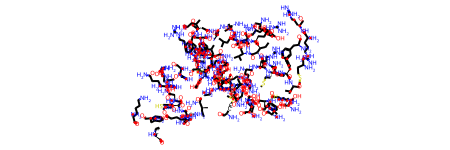

In [11]:
protein = new_list[0]
protein.to_molecule()

In [12]:
protein.residue_feature.shape

torch.Size([74, 21])

In [13]:
protein.visualize(title="A4VCI5", save_file="../../../result/fig_output/a4vci5.png", figure_size=(10, 10))

In [14]:
protein_pkl = '../../../data/dta-datasets/Davis/pocket_Protein.pkl'
with utils.smart_open(protein_pkl, "wb") as fout:
    pickle.dump(new_list, fout)

## GearNet Protein Construction

All the pocket are subgraph of the original protein. Read corrosponding pkl then generate pocket.

In [1]:
import pickle
from tqdm import tqdm
import pandas as pd
from torchdrug import utils

path = "../../../data/dta-datasets/Davis/"
protein_file = "../../../data/dta-datasets/Davis/davis_proteins.csv"

In [2]:
protein_df = pd.read_csv(protein_file, usecols=['Gene', 'Sequence','Accession Number', 'Entrez Gene Symbol', 'PDBID', 'AA length'])
protein_df

,Gene,Sequence,Accession Number,Entrez Gene Symbol,PDBID,AA length
0,AAK1,MKKFFDSRREQGGSGLGSGSSGGGGSTSGLGSGYIGRVFGIGRQQV...,NP_055726.3,AAK1,Q2M2I8,961
1,ABL1(E255K),PFWKILNPLLERGTYYYFMGQQPGKVLGDQRRPSLPALHFIKGAGK...,NP_005148.2,ABL1,Q59FK4,1167
2,ABL1(F317I),PFWKILNPLLERGTYYYFMGQQPGKVLGDQRRPSLPALHFIKGAGK...,NP_005148.2,ABL1,Q59FK4,1167
3,ABL1(F317I)p,PFWKILNPLLERGTYYYFMGQQPGKVLGDQRRPSLPALHFIKGAGK...,NP_005148.2,ABL1,Q59FK4,1167
4,ABL1(F317L),PFWKILNPLLERGTYYYFMGQQPGKVLGDQRRPSLPALHFIKGAGK...,NP_005148.2,ABL1,Q59FK4,1167
...,...,...,...,...,...,...
437,YES,MGCIKSKENKSPAIKYRPENTPEPVSTSVSHYGAEPTTVSPCPSSS...,NP_005424.1,YES1,P07947,543
438,YSK1,MAHLRGFANQHSRVDPEELFTKLDRIGKGSFGEVYKGIDNHTKEVV...,NP_006365.2,STK25,O00506,426
439,YSK4,MSSMPKPERHAESLLDICHDTNSSPTDLMTVTKNQNIILQSISRSE...,NP_079328.3,YSK4,Q56UN5,1328
440,ZAK,MSSLGASFVQIKFDDLQFFENCGGGSFGSVYRAKWISQDKEVAVKK...,NP_598407.1,ZAK,Q9NYL2,800


In [3]:
protein_pkl = '../../../data/dta-datasets/Davis/gearnet_Protein.pkl'  # pocket
with utils.smart_open(protein_pkl, "rb") as fin:
    protein_list = pickle.load(fin)

In [4]:
protein_list

[PackedProtein(batch_size=1, num_atoms=[961], num_bonds=[11102], num_residues=[961]),
 PackedProtein(batch_size=1, num_atoms=[1167], num_bonds=[15017], num_residues=[1167]),
 PackedProtein(batch_size=1, num_atoms=[1167], num_bonds=[15017], num_residues=[1167]),
 PackedProtein(batch_size=1, num_atoms=[1167], num_bonds=[15017], num_residues=[1167]),
 PackedProtein(batch_size=1, num_atoms=[1167], num_bonds=[15017], num_residues=[1167]),
 PackedProtein(batch_size=1, num_atoms=[1167], num_bonds=[15017], num_residues=[1167]),
 PackedProtein(batch_size=1, num_atoms=[1167], num_bonds=[15017], num_residues=[1167]),
 PackedProtein(batch_size=1, num_atoms=[1167], num_bonds=[15017], num_residues=[1167]),
 PackedProtein(batch_size=1, num_atoms=[1167], num_bonds=[15017], num_residues=[1167]),
 PackedProtein(batch_size=1, num_atoms=[1167], num_bonds=[15017], num_residues=[1167]),
 PackedProtein(batch_size=1, num_atoms=[1167], num_bonds=[15017], num_residues=[1167]),
 PackedProtein(batch_size=1, num_a

In [6]:
new_list = [] 
pdbs = protein_df["PDBID"].tolist() 
indexes = range(len(pdbs))
indexes = tqdm(indexes, "Constructing Pocket from PDB: ")
for index in indexes:
    # print(pdbs[index])
    protein = protein_list[index]
    csv_file = path + 'p2rank/predict_protein_list/AF-' + pdbs[index] + '-F1-model_v4.pdb_residues.csv'
    pdb_residues = pd.read_csv(csv_file)
    pdb_residues.columns = pdb_residues.columns.str.strip()
    pocket_list = pdb_residues["pocket"].unique()
    pocket_num = len(pocket_list) - 1
    current_pocket = []
    for i in range(pocket_num):
        current_pocket.extend(pdb_residues[pdb_residues["pocket"] == (i+1)].index.tolist())
        current_pocket.sort()
    pocket = protein.subresidue(index=current_pocket)
    new_list.append(pocket)

Constructing Pocket from PDB: 100%|██████████| 442/442 [00:03<00:00, 140.10it/s]


In [7]:
new_list[0]

PackedProtein(batch_size=1, num_atoms=[74], num_bonds=[647], num_residues=[74])

In [9]:
new_list[0].residue_feature

tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]])

In [8]:
protein_pkl = '../../../data/dta-datasets/Davis/gearnet_pocket_Protein.pkl'  # _pocket
with utils.smart_open(protein_pkl, "wb") as fout:
    pickle.dump(new_list, fout)

***

In [11]:
protein_pkl = '../../../data/dta-datasets/Davis/gearnetesm650m_Protein.pkl'  # pocket
with utils.smart_open(protein_pkl, "rb") as fin:
    protein_list = pickle.load(fin)

In [12]:
protein_list

[PackedProtein(batch_size=1, num_atoms=[961], num_bonds=[11102], num_residues=[961]),
 PackedProtein(batch_size=1, num_atoms=[1167], num_bonds=[15017], num_residues=[1167]),
 PackedProtein(batch_size=1, num_atoms=[1167], num_bonds=[15017], num_residues=[1167]),
 PackedProtein(batch_size=1, num_atoms=[1167], num_bonds=[15017], num_residues=[1167]),
 PackedProtein(batch_size=1, num_atoms=[1167], num_bonds=[15017], num_residues=[1167]),
 PackedProtein(batch_size=1, num_atoms=[1167], num_bonds=[15017], num_residues=[1167]),
 PackedProtein(batch_size=1, num_atoms=[1167], num_bonds=[15017], num_residues=[1167]),
 PackedProtein(batch_size=1, num_atoms=[1167], num_bonds=[15017], num_residues=[1167]),
 PackedProtein(batch_size=1, num_atoms=[1167], num_bonds=[15017], num_residues=[1167]),
 PackedProtein(batch_size=1, num_atoms=[1167], num_bonds=[15017], num_residues=[1167]),
 PackedProtein(batch_size=1, num_atoms=[1167], num_bonds=[15017], num_residues=[1167]),
 PackedProtein(batch_size=1, num_a

In [13]:
new_list = [] 
pdbs = protein_df["PDBID"].tolist() 
indexes = range(len(pdbs))
indexes = tqdm(indexes, "Constructing Pocket from PDB: ")
for index in indexes:
    # print(pdbs[index])
    protein = protein_list[index]
    csv_file = path + 'p2rank/predict_protein_list/AF-' + pdbs[index] + '-F1-model_v4.pdb_residues.csv'
    pdb_residues = pd.read_csv(csv_file)
    pdb_residues.columns = pdb_residues.columns.str.strip()
    pocket_list = pdb_residues["pocket"].unique()
    pocket_num = len(pocket_list) - 1
    current_pocket = []
    for i in range(pocket_num):
        current_pocket.extend(pdb_residues[pdb_residues["pocket"] == (i+1)].index.tolist())
        current_pocket.sort()
    pocket = protein.subresidue(index=current_pocket)
    new_list.append(pocket)

Constructing Pocket from PDB: 100%|██████████| 442/442 [00:03<00:00, 133.52it/s]


In [14]:
new_list[0]

PackedProtein(batch_size=1, num_atoms=[74], num_bonds=[647], num_residues=[74])

In [15]:
new_list[0].residue_feature

tensor([[ 1.8379,  0.0352, -2.0586,  ...,  2.1759,  0.5089,  0.2074],
        [ 2.3967, -1.2181, -0.0760,  ...,  2.0317,  1.2463,  1.8011],
        [ 1.6708, -1.3230,  2.0300,  ...,  2.2440, -0.1186,  1.5193],
        ...,
        [-1.7723, -2.3282,  1.9838,  ...,  1.5590,  1.2318, -0.1500],
        [-1.2548, -2.0109,  1.8080,  ...,  1.5811,  1.4041,  0.1994],
        [-3.4375, -6.4542,  1.6031,  ..., -3.1322,  1.2477,  5.0044]],
       grad_fn=<IndexBackward0>)

In [16]:
protein_pkl = '../../../data/dta-datasets/Davis/gearnetesm_pocket_Protein.pkl'
with utils.smart_open(protein_pkl, "wb") as fout:
    pickle.dump(new_list, fout)

## Test Zone

In [2]:
from torchdrug import datasets, transforms
# protein_view = transforms.ProteinView(view="residue", keys="graph1")
dataset = datasets.Davis(path='../../../data/dta-datasets/Davis/', protein_method="pocket")   # , transform=protein_view

==================== Using smile drug method and pocket protein method! ====================


Constructing Dataset from pkl file: 100%|██████████| 30056/30056 [00:00<00:00, 2819592.96it/s]


In [2]:
dataset

Davis(
  #sample: 30056
  #task: 1
)

In [3]:
protein = dataset[0]['graph1']
protein

Protein(num_atom=442, num_bond=844, num_residue=54)

In [4]:
protein.node_feature.shape

torch.Size([442, 67])

In [7]:
protein_mol = protein.to_molecule()

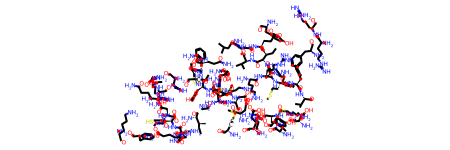

In [8]:
protein_mol

In [9]:
degree = protein.degree_in + protein.degree_out
print("Average degree: ", degree.mean().item())
print("Maximum degree: ", degree.max().item())
print("Minimum degree: ", degree.min().item())
print("Number of zero-degree nodes: ", (degree == 0).sum().item())

Average degree:  3.819004535675049
Maximum degree:  6.0
Minimum degree:  2.0
Number of zero-degree nodes:  0


In [6]:
dataset.data[0][0].num_relation

tensor(4)

In [7]:
import pickle
from torchdrug import utils

In [10]:
protein_pkl = '../../../data/dta-datasets/Davis/pocket_Protein.pkl'
with utils.smart_open(protein_pkl, "rb") as fin:
    protein_list = pickle.load(fin)

In [11]:
protein_list

[Protein(num_atom=442, num_bond=844, num_residue=54),
 Protein(num_atom=1055, num_bond=2028, num_residue=131),
 Protein(num_atom=1055, num_bond=2028, num_residue=131),
 Protein(num_atom=1055, num_bond=2028, num_residue=131),
 Protein(num_atom=1055, num_bond=2028, num_residue=131),
 Protein(num_atom=1055, num_bond=2028, num_residue=131),
 Protein(num_atom=1055, num_bond=2028, num_residue=131),
 Protein(num_atom=1055, num_bond=2028, num_residue=131),
 Protein(num_atom=1055, num_bond=2028, num_residue=131),
 Protein(num_atom=1055, num_bond=2028, num_residue=131),
 Protein(num_atom=1055, num_bond=2028, num_residue=131),
 Protein(num_atom=1055, num_bond=2028, num_residue=131),
 Protein(num_atom=1055, num_bond=2028, num_residue=131),
 Protein(num_atom=1055, num_bond=2028, num_residue=131),
 Protein(num_atom=1055, num_bond=2028, num_residue=131),
 Protein(num_atom=1055, num_bond=2028, num_residue=131),
 Protein(num_atom=951, num_bond=1838, num_residue=119),
 Protein(num_atom=449, num_bond=848

In [12]:
protein_list[0].node_feature.shape

torch.Size([442, 67])

In [13]:
for protein in protein_list:
    degree = protein.degree_in + protein.degree_out
    print("==============================")
    print("Average degree: ", degree.mean().item())
    print("Maximum degree: ", degree.max().item())
    print("Minimum degree: ", degree.min().item())
    print("Number of zero-degree nodes: ", (degree == 0).sum().item())
    print("==============================")

Average degree:  3.819004535675049
Maximum degree:  6.0
Minimum degree:  2.0
Number of zero-degree nodes:  0
Average degree:  3.8445496559143066
Maximum degree:  6.0
Minimum degree:  2.0
Number of zero-degree nodes:  0
Average degree:  3.8445496559143066
Maximum degree:  6.0
Minimum degree:  2.0
Number of zero-degree nodes:  0
Average degree:  3.8445496559143066
Maximum degree:  6.0
Minimum degree:  2.0
Number of zero-degree nodes:  0
Average degree:  3.8445496559143066
Maximum degree:  6.0
Minimum degree:  2.0
Number of zero-degree nodes:  0
Average degree:  3.8445496559143066
Maximum degree:  6.0
Minimum degree:  2.0
Number of zero-degree nodes:  0
Average degree:  3.8445496559143066
Maximum degree:  6.0
Minimum degree:  2.0
Number of zero-degree nodes:  0
Average degree:  3.8445496559143066
Maximum degree:  6.0
Minimum degree:  2.0
Number of zero-degree nodes:  0
Average degree:  3.8445496559143066
Maximum degree:  6.0
Minimum degree:  2.0
Number of zero-degree nodes:  0
Average deg